In [1]:
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler


from utils import seed_torch, vqvae_transformer_loss, get_non_corrupt_files
from dataset import AudioDataset
from timeseries_vqvae_transformer import TransformerVQVAE
import matplotlib.pyplot as plt

from tqdm import tqdm
import glob
import os


cuda


In [2]:
seed_torch(42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
batch_size = 32
num_workers = 4

In [4]:
path = '../../data/MIDICaps'
path = os.path.join(path, '*.wav')
print(path)
filenames  = glob.glob(path)
print(len(filenames))
train_dataset = AudioDataset(filenames[:7000], return_time_series = True)
valid_dataset = AudioDataset(filenames[7000:14000], return_time_series = True)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers = num_workers, pin_memory = False, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, num_workers = num_workers, pin_memory = False, shuffle=False)

../../data/MIDICaps/*.wav
40794


In [5]:
batch = next(iter(train_dataloader))

In [6]:
# pth_file = torch.load('timeseries_vae_model/timestamp_model_with_lpips_lpipsw1000_beta00001.pth')
pth_file = torch.load('vq_vae/model4.pth')
saved_weights  = pth_file['model']

model = TransformerVQVAE()
model.to(device)
model.load_state_dict(saved_weights)
model.eval()

/home/theodore/Desktop/regularized music encoder/.venv/lib/python3.11/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


TransformerVQVAE(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  )
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=256, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=256, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    

showing melspec of image 15
torch.Size([1, 128, 216])


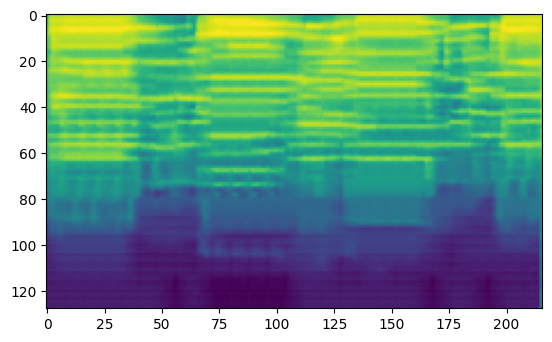

torch.Size([1, 128, 216])


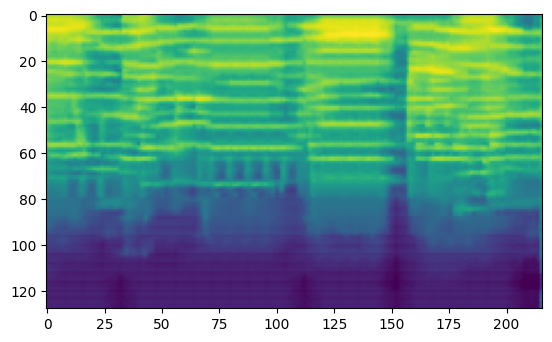

torch.Size([1, 128, 216])


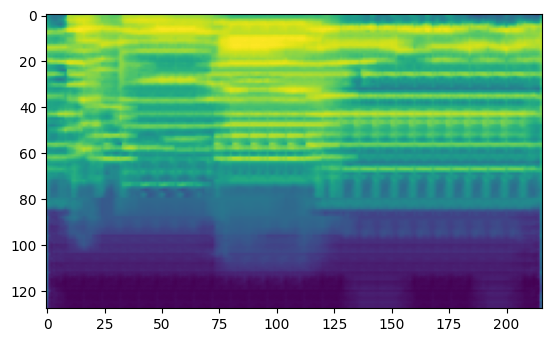

torch.Size([1, 128, 216])


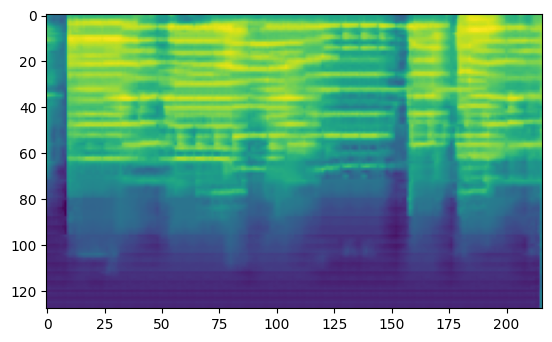

torch.Size([1, 128, 216])


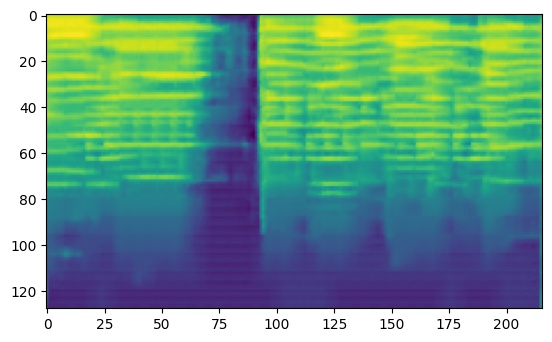

torch.Size([1, 128, 216])


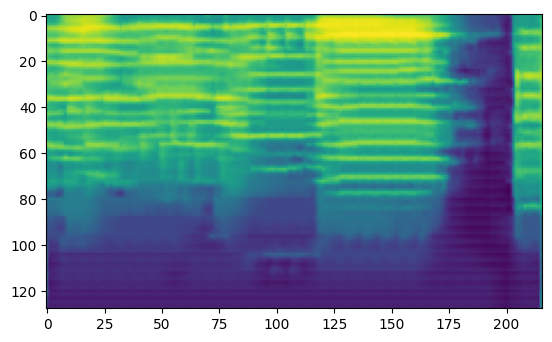

In [29]:
idx = 15

if idx > batch_size - 1:
    idx = batch_size - 1
print(f'showing melspec of image {idx}')

for i in range(len(batch)):
    current_melspec = batch[i]['melspec'][idx]
    dim1, dim2 = current_melspec.size()
    current_melspec = current_melspec.view(-1, 1, dim1, dim2).to(device)

    z = model.encode(current_melspec)
    z_q, *_ = model.vq(z)
    current_melspec = model.decode(z_q)[0]
    print(current_melspec.shape)
    current_melspec = current_melspec.permute(1, 2, 0).detach().cpu().numpy()
    plt.imshow(current_melspec)
    plt.show()

In [8]:
class MatrixGenerator():
    def __init__(self, input_batch):
        self.input_batch = input_batch
        self.output_batch_size = len(self.input_batch)
    
    def generate(self):
        pass

    def get_batch(self):
        self.output_batch = []
        for i in range(len(self.output_batch_size)):
            self.output_batch.append(self.generate())

        return self.output_batch

            